In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [ ]:
df=pd.read_csv("/content/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
train_df=df.sample(frac=0.75,random_state=4)
val_df=df.drop(train_df.index)

In [ ]:
train_df.shape

(1199, 12)

In [ ]:
val_df.shape

(400, 12)

In [ ]:
#  separate the targets and labels
x_train=train_df.drop('quality',axis=1)
x_val=val_df.drop('quality',axis=1)
y_train=train_df['quality']
y_val=val_df['quality']

In [ ]:
input_Shape=[x_train.shape[1]]


In [ ]:
#create a linear model
model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=10,input_shape=input_Shape)
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                120       
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='mae')

In [ ]:
losses=model.fit(x_train,y_train,
                 validation_data=(x_val,y_val),
                 batch_size=256,
                 epochs=15,)

Epoch 1/15
5/5 [==============================] - 1s 43ms/step - loss: 16.6927 - val_loss: 16.1425
Epoch 2/15
5/5 [==============================] - 0s 13ms/step - loss: 16.2476 - val_loss: 15.7094
Epoch 3/15
5/5 [==============================] - 0s 9ms/step - loss: 15.8153 - val_loss: 15.2835
Epoch 4/15
5/5 [==============================] - 0s 10ms/step - loss: 15.3846 - val_loss: 14.8684
Epoch 5/15
5/5 [==============================] - 0s 15ms/step - loss: 14.9686 - val_loss: 14.4661
Epoch 6/15
5/5 [==============================] - 0s 9ms/step - loss: 14.5666 - val_loss: 14.0777
Epoch 7/15
5/5 [==============================] - 0s 15ms/step - loss: 14.1786 - val_loss: 13.7038
Epoch 8/15
5/5 [==============================] - 0s 9ms/step - loss: 13.8078 - val_loss: 13.3440
Epoch 9/15
5/5 [==============================] - 0s 9ms/step - loss: 13.4512 - val_loss: 12.9994
Epoch 10/15
5/5 [==============================] - 0s 10ms/step - loss: 13.1094 - val_loss: 12.6705
Epoch 11/15
5

In [ ]:
#first 3 rows of features of our data as input to make predictions
model.predict(x_val.iloc[0:3, :])


1/1 [==============================] - 0s 44ms/step


array([[  7.097622 ,  -1.8743691,   5.158876 ,  20.976995 , -16.713795 ,
          3.9540706, -13.381364 ,  -8.422405 ,   3.876405 ,   3.0370347],
       [ 10.25886  ,   7.269839 ,  10.887549 ,  48.5627   , -48.94885  ,
          4.878283 , -25.643085 , -21.29358  ,   9.552385 ,   3.127605 ],
       [  7.356725 ,   1.6053817,   6.5209117,  32.375042 , -29.476086 ,
          4.3700633, -18.699333 , -15.542771 ,   5.3343887,   3.5801518]],
      dtype=float32)

In [ ]:
y_val.iloc[0:3]


0     5
9     5
12    5
Name: quality, dtype: int64

In [ ]:
loss_df = pd.DataFrame(losses.history)


<Axes: >

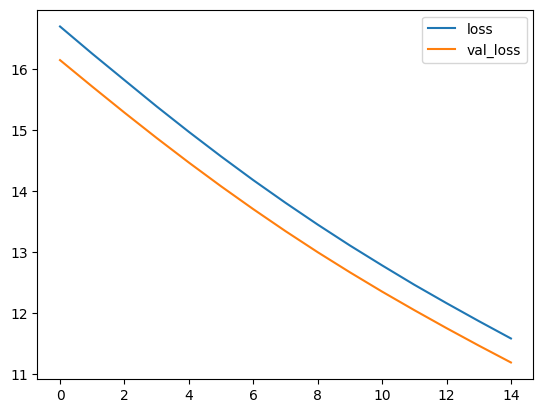

In [ ]:
loss_df = pd.DataFrame(losses.history)

loss_df.loc[:,['loss','val_loss']].plot()


In [ ]:
input_shape = (11,)

In [ ]:
model = tf.keras.Sequential([
	tf.keras.layers.Dense(units=64, activation='relu',	input_shape=input_shape),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='mae')

In [ ]:
losses=model.fit(x_train,y_train,
                 validation_data=(x_val,y_val),
                 batch_size=256,
                 epochs=15,)

Epoch 1/15
5/5 [==============================] - 1s 48ms/step - loss: 3.0389 - val_loss: 2.4991
Epoch 2/15
5/5 [==============================] - 0s 15ms/step - loss: 2.3648 - val_loss: 1.5326
Epoch 3/15
5/5 [==============================] - 0s 14ms/step - loss: 1.4973 - val_loss: 1.0268
Epoch 4/15
5/5 [==============================] - 0s 14ms/step - loss: 0.9224 - val_loss: 0.6821
Epoch 5/15
5/5 [==============================] - 0s 9ms/step - loss: 0.6871 - val_loss: 0.7252
Epoch 6/15
5/5 [==============================] - 0s 15ms/step - loss: 0.6878 - val_loss: 0.6281
Epoch 7/15
5/5 [==============================] - 0s 10ms/step - loss: 0.6387 - val_loss: 0.6371
Epoch 8/15
5/5 [==============================] - 0s 15ms/step - loss: 0.6168 - val_loss: 0.5992
Epoch 9/15
5/5 [==============================] - 0s 11ms/step - loss: 0.5889 - val_loss: 0.5557
Epoch 10/15
5/5 [==============================] - 0s 15ms/step - loss: 0.5532 - val_loss: 0.5528
Epoch 11/15
5/5 [=============

In [ ]:
model.predict(x_val.iloc[0:3, :])


1/1 [==============================] - 0s 141ms/step


array([[5.164617 ],
       [5.575921 ],
       [5.1293774]], dtype=float32)

In [ ]:
y_val.iloc[0:3]


0     5
9     5
12    5
Name: quality, dtype: int64

<Axes: >

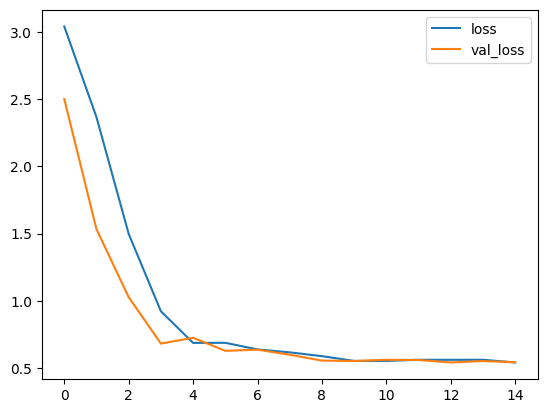

In [ ]:
loss_df = pd.DataFrame(losses.history)

loss_df.loc[:,['loss','val_loss']].plot()
